# Programming for Data Analysis
## Project 1 - Synthesis of a data set

The purpose of this project is to investigate a real-world phenomenon, examine how data related to the phenomenon occurs, and the synthesise data that follows similar patterns to the real-world phenomenon.

For this project I will be looking at how happiness varies across countries and how it correlates with a variety of other factors. To do this I will be using the World Happiness Report as found here: https://www.kaggle.com/datasets/unsdsn/world-happiness/

In [24]:
# Import packages that I will be using for analysis and synthesis of data.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from fitter import Fitter
import matplotlib.pyplot as plt

In [2]:
# Read in the data from a csv (comma separated value) file into a pandas dataframe.
df = pd.read_csv('data/2016.csv')
print(df)

         Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460                      7.592   
1              

In [3]:
# Visualise the data using seaborn 
# sns.pairplot(df)


### Problem encountered
Trying to visualise the entire dataset using seaborn's pairplot takes a long time and results in a plot that is too large to be immediately useful. For this reason and to remain safely within the scope of the project I will reduce the number of variables to be investigated.


In [4]:
sub_df = df.iloc[:,[0,1,3,6,8,10]]
print(sub_df)


         Country                           Region  Happiness Score  \
0        Denmark                   Western Europe            7.526   
1    Switzerland                   Western Europe            7.509   
2        Iceland                   Western Europe            7.501   
3         Norway                   Western Europe            7.498   
4        Finland                   Western Europe            7.413   
..           ...                              ...              ...   
152        Benin               Sub-Saharan Africa            3.484   
153  Afghanistan                    Southern Asia            3.360   
154         Togo               Sub-Saharan Africa            3.303   
155        Syria  Middle East and Northern Africa            3.069   
156      Burundi               Sub-Saharan Africa            2.905   

     Economy (GDP per Capita)  Health (Life Expectancy)  \
0                     1.44178                   0.79504   
1                     1.52733            

c:\Users\thomas.brophy\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


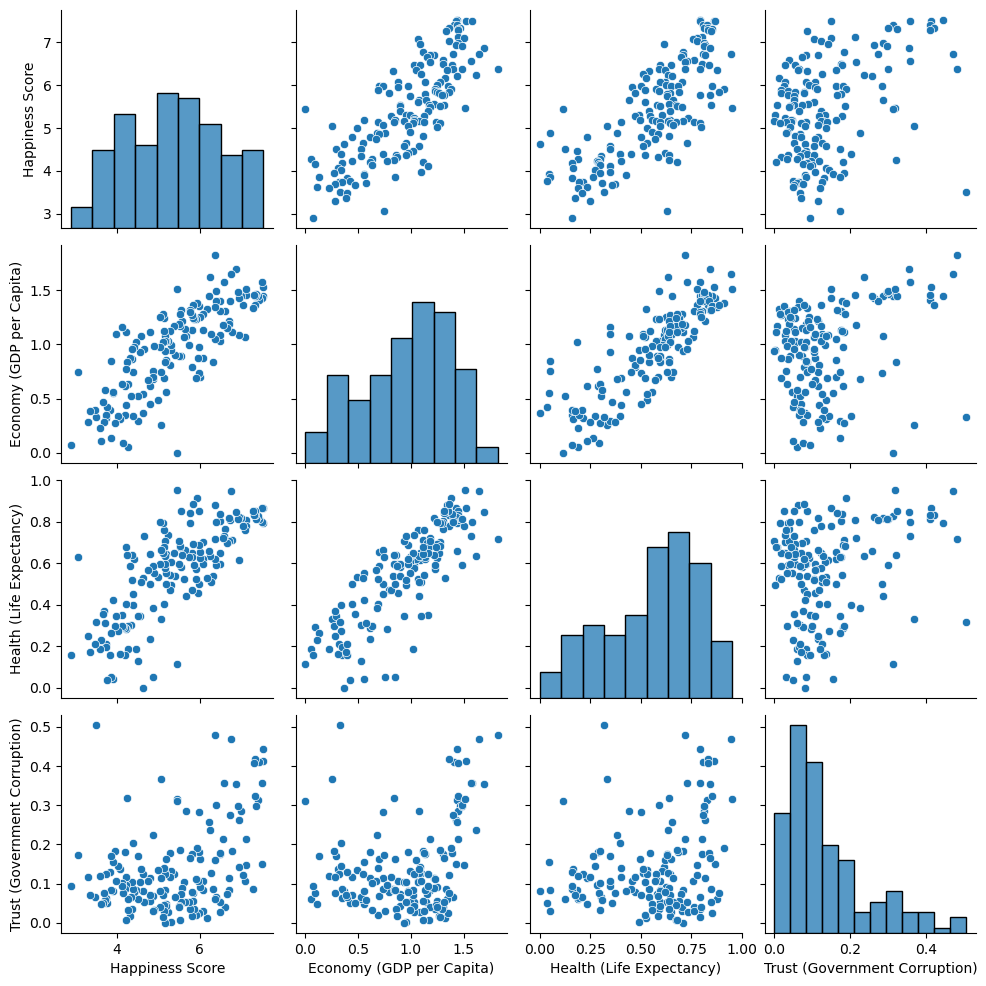

In [5]:
sns.pairplot(sub_df)

In [6]:
happiness = sub_df.iloc[:,[2]]
economy = sub_df.iloc[:,[3]]
health = sub_df.iloc[:,[4]]
trust = sub_df.iloc[:,[5]]

In [7]:
# I am commenting out the fitter lines of code as they take a long time to run.

#f = Fitter(happiness)
#f.fit()
#f.summary()

In [8]:
#e = Fitter(economy)
#e.fit()
#e.summary()

In [9]:
#h = Fitter(health)
#h.fit()
#h.summary()

In [10]:
#t = Fitter(trust)
#t.fit()

In [11]:
#h.get_best()

In [12]:
#e.get_best()

In [13]:
#f.get_best()

In [14]:
#t.get_best()

From the above we can see that the most appropriate distributions to use when generating the data are:
- Happiness
    - Tukey Lambda
- Economy
    - Burr
- Health
    - Triangular
            

In [15]:
health.max()

Health (Life Expectancy)    0.95277
dtype: float64

In [16]:

rng_health = scipy.stats.triang.rvs(c=0.8429646382298399,size = 1000)
rng_economy = scipy.stats.burr.rvs(c=21.026008731248215,d=0.07966113333826673,size=1000)
rng_happiness = scipy.stats.tukeylambda.rvs(0.4871656296581484,size = 1000)
rng_trust = scipy.stats.fisk.rvs(c=2.3311825021009334, size = 1000)


In [17]:
rng_health

array([0.1878029 , 0.77900274, 0.63371441, 0.4788494 , 0.71949989,
       0.68113881, 0.47893583, 0.52432304, 0.27163209, 0.58720473,
       0.68226016, 0.92931632, 0.77084553, 0.09687255, 0.32298091,
       0.75623786, 0.71904471, 0.8391758 , 0.44624027, 0.87504526,
       0.72731189, 0.93194128, 0.62144384, 0.52975567, 0.41606119,
       0.84375692, 0.19027009, 0.50888854, 0.53136857, 0.91450119,
       0.85000327, 0.34140966, 0.75170789, 0.75294426, 0.38950461,
       0.58724857, 0.28831933, 0.19423056, 0.81092715, 0.45271165,
       0.50286739, 0.43690262, 0.48079243, 0.25806954, 0.57568253,
       0.49459948, 0.73477385, 0.71250913, 0.11175457, 0.79215499,
       0.22639419, 0.82254636, 0.60249342, 0.35033268, 0.6920714 ,
       0.85510492, 0.46312433, 0.81177067, 0.32661822, 0.39646517,
       0.34631275, 0.54489967, 0.50319951, 0.7582921 , 0.67453429,
       0.90337361, 0.77373072, 0.56635016, 0.17440829, 0.31299607,
       0.35506429, 0.35694756, 0.75089475, 0.20488662, 0.22840

In [18]:
rng_economy

array([0.39541995, 0.61394669, 0.44927489, 0.45840312, 0.75036584,
       0.91248046, 0.13885157, 0.63964702, 0.96990688, 0.85523585,
       0.2151512 , 0.41129307, 0.41518329, 0.57062544, 0.82595964,
       0.83004272, 0.87562081, 0.05273285, 0.27243737, 0.85637323,
       0.66019859, 0.51755512, 0.92384187, 0.27390893, 0.55464453,
       0.58346363, 0.62425449, 0.31095851, 0.99842283, 0.83082447,
       0.48878909, 1.01841301, 0.53238756, 0.68035013, 0.60926418,
       0.14545432, 0.65719029, 0.56764853, 0.61505016, 0.6102756 ,
       0.19450332, 0.26592595, 0.51905273, 0.09618884, 0.84166195,
       0.94027788, 0.63516337, 0.40964682, 0.62053079, 0.46892519,
       0.93154071, 0.51814356, 0.80992111, 0.55271358, 0.54697229,
       0.65066597, 0.90329344, 0.98534428, 0.3943937 , 0.48120886,
       0.74587223, 0.8411264 , 0.82077013, 0.77705341, 0.89222103,
       0.44770849, 0.41802192, 0.7582932 , 0.55824935, 0.42746665,
       0.65348779, 0.49498259, 0.86863807, 1.06025276, 0.44661

In [19]:
rng_happiness

array([-1.55900997e+00,  3.15172465e-01, -1.01250281e+00, -1.13502995e+00,
        1.15699373e+00, -1.28378125e-02, -5.17580550e-01, -2.21574185e-03,
       -1.54078319e+00, -6.01337866e-01, -1.39711669e-01,  7.01111702e-01,
       -2.78288257e-01,  2.85540490e-01, -1.20051276e+00,  4.80373739e-01,
       -1.50185777e+00,  3.59080148e-01, -8.43431677e-01, -8.96660777e-01,
        6.58917053e-01,  1.42596717e-01,  7.99760655e-01,  8.82947099e-01,
       -9.17387956e-01,  2.58943395e-01, -4.13001838e-01,  2.17837440e-02,
       -8.54904658e-01, -5.20080996e-01, -8.96428433e-01, -6.44961811e-02,
       -6.25188572e-01, -1.70546739e-01,  3.25467435e-01,  1.07385821e+00,
       -1.23084853e+00,  1.25347715e+00,  4.09788781e-01,  4.53517043e-01,
       -2.44523902e-01, -5.06063478e-01,  1.27526353e+00,  1.02446446e+00,
       -1.54776430e-01,  4.95749612e-01, -5.49867862e-01, -7.33684424e-01,
        9.44760609e-01,  1.01245547e+00, -8.46385743e-01,  1.19402085e+00,
        1.70054690e+00,  

In [20]:
df2 = pd.DataFrame({'Happiness': rng_happiness, 'Economy': rng_economy, 'Life Expectancy': rng_health, 'Trust': rng_trust})

c:\Users\thomas.brophy\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


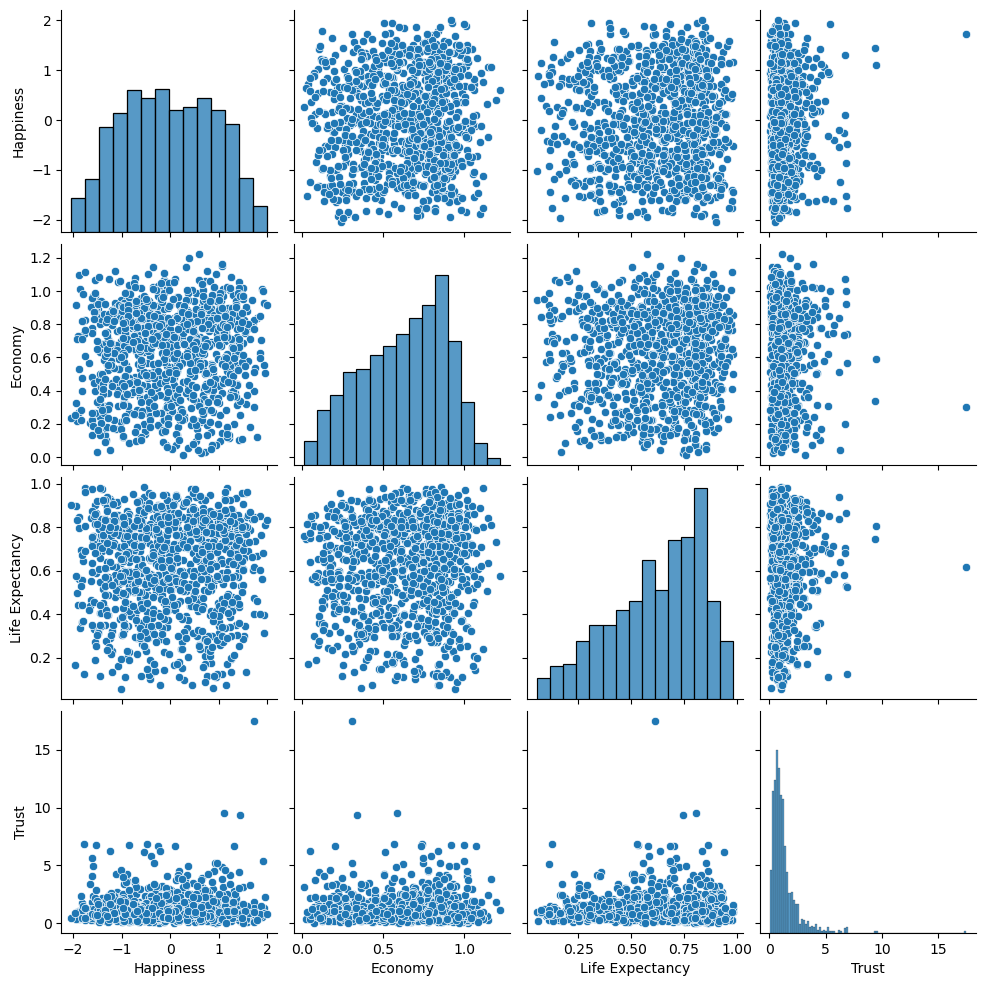

In [25]:
sns_plot = sns.pairplot(df2)
plt.savefig('df2.png')

The above pairplot shows data that have a similar spread to the original data. However the obvious correlation between specific phenomena are missing.